In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Dataset
dataset = pd.read_csv('/home/sahil/Desktop/phishing_detection/main.csv')
# # Remove rows where any value is greater than 88
# df_cleaned = dataset[(dataset <= 88).all(axis=1)]

# # Save the cleaned DataFrame back to a CSV file
# df_cleaned.to_csv('data_cleaned.csv', index=False)
# # X = dataset.iloc[:, 1:87].values
# # y = dataset.iloc[:, 87].values



In [78]:
dataset.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'path_extension',
       'nb_redirection', 'nb_external_redirection', 'length_words_raw',
       'char_repeat', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_host',
       'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path',
       'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       

In [65]:
# count=0
# for i in X[0] :
#     if str(type(i))=="<class 'str'>" :
#        count+=1
# print(count)

12


In [66]:
# # Convert columns with string values to floats
# def convert_columns_to_float(array):
#     for col in range(array.shape[1]):
#         try:
#             for i in range(len(array[:, col])) :
#                 array[i,col]=float(array[i,col])
#         except ValueError:
#             # Skip columns that cannot be converted
#             pass
#     return array
# X = convert_columns_to_float(X.copy())

In [71]:
# count=0
# s=set()
# for j in range(len(X)):
#     s.add(len(X[j]))
# #  for i in X[j] :
# #     if str(type(i))=="<class 'str'>" :
# #        count+=1
#     # print(type(i))
# print(s)

{86}


In [179]:
from sklearn.preprocessing import LabelEncoder
X = dataset.iloc[-500:, 1:-1].values
y = dataset.iloc[-500:, -1].values
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [180]:
unik=set(y)
unik

{np.int64(0), np.int64(1)}

In [181]:
legi=0
phi=0
for i in y :
    if i =="legitimate" :
        legi+=1
    else :
        phi+=1
print(legi,phi)

0 500


In [182]:
# Split Dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [183]:
from xgboost import XGBClassifier
# Initialize and train the XGBoost classifier
classifier = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
classifier.fit(X_train, y_train)

/home/sahil/anaconda3/envs/phishing/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:08:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[59  4]
 [ 5 57]]


0.928

In [189]:
import pickle
# Save the model to a file
model_filename = 'xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(classifier, file)

In [185]:
# Calculate accuracy on training set
train_accuracy = classifier.score(X_train, y_train)
print(f"Training Set Accuracy: {train_accuracy:.5f}")

# Calculate accuracy on test set
test_accuracy = classifier.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.5f}")

Training Set Accuracy: 1.00000
Test Set Accuracy: 0.92800


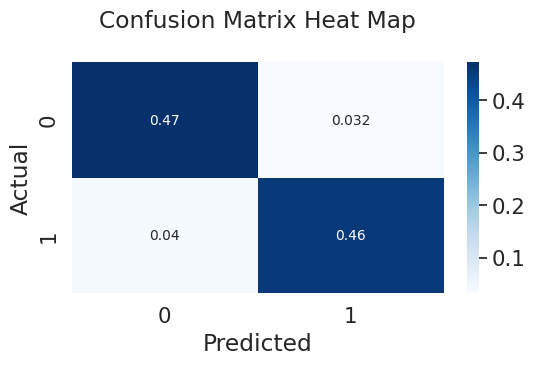

In [186]:
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix', dpi=300, bbox_inches='tight')

In [187]:
import feature_extractor as fe

In [188]:
# Function to predict a single data point
def predict_single_data_point(data_point):
    # Assuming data_point is a list or array of the same length as a single row of X
    # Scale the data point using the same scaler
    data_point_scaled = sc.transform([data_point])
    # Predict the class
    prediction = classifier.predict(data_point_scaled)
    return prediction[0]


In [169]:
url="http://whatsappjoingrup.qpoe.com/login.php"

datapoint = fe.extract_features(url)


In [170]:
print(datapoint)

None


In [171]:
# Example single data point (replace this with your actual data point)
# Ensure it has the same number of features as the training data
example_data_point = datapoint[1:]
# example_data_point = X[9]  # Using the first test sample for demonstration

# Predict the class for the example data point
predicted_class = predict_single_data_point(example_data_point)
print(f"Predicted class for the example data point: {predicted_class}")

TypeError: 'NoneType' object is not subscriptable

count the no. of columns

In [151]:
# Slice the dataset to get the desired columns
desired_columns = dataset.iloc[:, 1:-1]

# Count the number of columns in the desired range
num_columns_in_range = desired_columns.shape[1]
print(num_columns_in_range)

86
